In [ ]:
import numpy as np
import random
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from multiprocessing import Pool
import warnings

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [ ]:
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
x_train = X_train.dropna()
y_train = y_train[x_train.index]
x_val = X_val.dropna()
y_val = y_val[x_val.index]

In [ ]:
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
X_val_norm = norm.transform(x_val)

In [ ]:
X_train_norm_df = pd.DataFrame(X_train_norm,columns=x_train.columns)
X_val_norm_df = pd.DataFrame(X_val_norm,columns=x_val.columns)
X_train_norm_df

ROA(C) before interest and depreciation before interest  \
0                                              0.498513          
1                                              0.506606          
2                                              0.508799          
3                                              0.499976          
4                                              0.477892          
...                                                 ...          
5450                                           0.542729          
5451                                           0.550870          
5452                                           0.507288          
5453                                           0.581339          
5454                                           0.578560          

       ROA(A) before interest and % after tax  \
0                                    0.542848   
1                                    0.562309   
2                                    0.561001   
3                                    0.562527   
4                                    0.547700   
...                                       ...   
5450                                 0.601123   
5451                                 0.620148   
5452                                 0.562200   
5453                                 0.644407   
5454                                 0.627780   

       ROA(B) before interest and depreciation after tax  \
0                                              0.544622    
1                                              0.558863    
2                                              0.554687    
3                                              0.546764    
4                                              0.529150    
...                                                 ...    
5450                                           0.583597    
5451                                           0.610793    
5452                                           0.556989    
5453                                           0.633706    
5454                                           0.610311    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.599194                      0.599036   
1                    0.609334                      0.609334   
2                    0.614242                      0.614055   
3                    0.597825                      0.597825   
4                    0.600362                      0.600362   
...                       ...                           ...   
5450                 0.598236                      0.598229   
5451                 0.610422                      0.610228   
5452                 0.605529                      0.605371   
5453                 0.617247                      0.617247   
5454                 0.615835                      0.615842   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998986                    0.797412   
1                   0.999027                    0.797450   
2                   0.999094                    0.797533   
3                   0.999004                    0.797411   
4                   0.998975                    0.797412   
...                      ...                         ...   
5450                0.999014                    0.797499   
5451                0.999101                    0.797553   
5452                0.999033                    0.797433   
5453                0.999129                    0.797665   
5454                0.999180                    0.797736   

       After-tax net Interest Rate  \
0                         0.809330   
1                         0.809375   
2                         0.809424   
3                         0.809329   
4                         0.809333   
...                            ...   
5450                      0.809394   
5451                      0.809468   
5452                      0.809354   
5453                      0.809550   
5454    

In [ ]:
num_chunks = 10
X_train_chunks = np.array_split(X_train_norm_df, num_chunks)
y_train_chunks = np.array_split(y_train, num_chunks)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
def tune_hyperparameters(X_chunk, y_chunk, param_grid):
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_chunk, y_chunk)
    return grid_search.best_estimator_, grid_search.best_params_

In [ ]:
pool = Pool(processes=4)
results = pool.starmap(tune_hyperparameters, [(X_chunk, y_chunk, param_grid) for X_chunk, y_chunk in zip(X_train_chunks, y_train_chunks)])
pool.close()
pool.join()


best_models = [result[0] for result in results]
best_params = [result[1] for result in results]

/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning

In [ ]:
def predict_with_models(models, X):
    predictions = np.array([model.predict(X) for model in models])

    majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), arr=predictions, axis=0)
    return majority_votes

y_pred = predict_with_models(best_models, X_val_norm_df)
results = pd.DataFrame(y_pred,columns=['prediction'])
results['prediction'].unique()

array([0, 1])

In [ ]:
dfdes=df.describe()
dfdes

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [ ]:
filtered_df = dfdes.loc[['mean', 'max', 'min']]
filtered_df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
mean   0.032263                                            0.50518          
max    1.000000                                            1.00000          
min    0.000000                                            0.00000          

       ROA(A) before interest and % after tax  \
mean                                 0.558625   
max                                  1.000000   
min                                  0.000000   

       ROA(B) before interest and depreciation after tax  \
mean                                           0.553589    
max                                            1.000000    
min                                            0.000000    

       Operating Gross Margin   Realized Sales Gross Margin  \
mean                 0.607948                      0.607929   
max                  1.000000                      1.000000   
min                  0.000000                      0.000000   

       Operating Profit Rate   Pre-tax net Interest Rate  \
mean                0.998755                     0.79719   
max                 1.000000                     1.00000   
min                 0.000000                     0.00000   

       After-tax net Interest Rate  \
mean                      0.809084   
max                       1.000000   
min                       0.000000   

       Non-industry income and expenditure/revenue  ...  \
mean                                      0.303623  ...   
max                                       1.000000  ...   
min                                       0.000000  ...   

       Net Income to Total Assets   Total assets to GNP price  \
mean                      0.80776                1.862942e+07   
max                       1.00000                9.820000e+09   
min                       0.00000                0.000000e+00   

       No-credit Interval   Gross Profit to Sales  \
mean             0.623915                0.607946   
max              1.000000                1.000000   
min              0.000000                0.000000   

       Net Income to Stockholder's Equity   Liability to Equity  \
mean                             0.840402              0.280365   
max                              1.000000              1.000000   
min                              0.000000              0.000000   

       Degree of Financial Leverage (DFL)  \
mean                             0.027541   
max                              1.000000   
min                              0.000000   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
mean                                           0.565358                 1.0   
max                                            1.000000                 1.0   
min                                            0.000000                 1.0   

       Equity to Liability  
mean              0.047578  
max               1.000000  
min               0.000000  

[3 rows x 96 columns]

In [ ]:

ratios = (filtered_df.loc['max'] - filtered_df.loc['mean']) / (filtered_df.loc['max'] - filtered_df.loc['min'])
satisfying_features = ratios[(ratios < 0.2) | (ratios > 0.8)].index.tolist()

print(len(satisfying_features))

52


In [ ]:
outlier_check = [' Operating Profit Rate',' Pre-tax net Interest Rate',' After-tax net Interest Rate']
for i in range(len(outlier_check)):
    q1 = df[outlier_check[i]].quantile(0.25)
    q3 = df[outlier_check[i]].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df1 = df[(df[outlier_check[i]] >= lower_bound) & (df[outlier_check[i]] <= upper_bound)]
df1

Bankrupt?   ROA(C) before interest and depreciation before interest  \
1             1                                           0.464291          
4             1                                           0.465022          
7             0                                           0.508361          
8             0                                           0.488519          
9             0                                           0.495686          
...         ...                                                ...          
6813          0                                           0.477600          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          

       ROA(A) before interest and % after tax  \
1                                    0.538214   
4                                    0.538432   
7                                    0.570922   
8                                    0.545137   
9                                    0.550916   
...                                       ...   
6813                                 0.531127   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   

       ROA(B) before interest and depreciation after tax  \
1                                              0.516730    
4                                              0.522298    
7                                              0.559077    
8                                              0.543284    
9                                              0.542963    
...                                                 ...    
6813                                           0.526099    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    

       Operating Gross Margin   Realized Sales Gross Margin  \
1                    0.610235                      0.610235   
4                    0.598783                      0.598783   
7                    0.601738                      0.601717   
8                    0.603612                      0.603612   
9                    0.599209                      0.599209   
...                       ...                           ...   
6813                 0.595829                      0.595858   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   

       Operating Profit Rate   Pre-tax net Interest Rate  \
1                   0.998946                    0.797380   
4                   0.998973                    0.797366   
7                   0.999009                    0.797449   
8                   0.998961                    0.797414   
9                   0.999001                    0.797404   
...                      ...                         ...   
6813                0.998905                    0.797375   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   

       After-tax net Interest Rate  \
1                         0.809301   
4                         0.809304   
7                         0.809362   
8                         0.809338   
9                         0.809320   
...                            ...   
6813                      0

In [ ]:
X1 = df1.drop('Bankrupt?', axis=1)
y1 = df1['Bankrupt?']
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
x_train1 = X_train1.dropna()
y_train1 = y_train1[x_train1.index]
x_val1 = X_val1.dropna()
y_val1 = y_val1[x_val1.index]

In [ ]:
norm1 = MinMaxScaler().fit(x_train1)
X_train_norm1 = norm1.transform(x_train1)
X_val_norm1 = norm1.transform(x_val1)
X_train_norm_df1 = pd.DataFrame(X_train_norm1,columns=x_train1.columns)
X_val_norm_df1 = pd.DataFrame(X_val_norm1,columns=x_val1.columns)

In [ ]:
num_chunks = 10
X_train_chunks1 = np.array_split(X_train_norm1, num_chunks)
y_train_chunks1 = np.array_split(y_train1, num_chunks)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
pool = Pool(processes=4)
results1 = pool.starmap(tune_hyperparameters, [(X_chunk, y_chunk, param_grid) for X_chunk, y_chunk in zip(X_train_chunks1, y_train_chunks1)])
pool.close()
pool.join()


best_models1 = [result[0] for result in results1]
best_params1 = [result[1] for result in results1]

/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning

In [ ]:
y_pred1 = predict_with_models(best_models1, X_val_norm_df1)
accuracy1 = accuracy_score(y_val1, y_pred1)
accuracy1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without

0.980688497061293

In [ ]:
corr_matrixs = x_train.corr(method='spearman').abs()

uppers = corr_matrixs.where(np.triu(np.ones(corr_matrixs.shape), k=1).astype(np.bool_))


high_intercorr = [column for column in uppers.columns if any(uppers[column] > 0.95)]
print(len(high_intercorr))
high_intercorr

29


[' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Average Collection Days',
 ' Quick Assets/Current Liability',
 ' Operating Funds to Liability',
 ' Current Liabilities/Equity',
 ' Fixed Assets to Assets',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Cash Flow to Total Assets',
 ' Cash Flow to Liability',
 ' CFO to Assets',
 ' Cash Flow to Equity',
 ' Current Liability to Current Assets',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity',
 ' Equity to Liability']

In [ ]:
remove_high_intercorr=high_intercorr[1:]
print(len(remove_high_intercorr))
df2 = df.drop(columns=remove_high_intercorr)
df2

28


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Operating Profit Rate  \
0                    0.601457                0.998969   
1                    0.610235                0.998946   
2                    0.601450                0.998857   
3                    0.583541                0.998700   
4                    0.598783                0.998973   
...                       ...                     ...   
6814                 0.604455                0.998992   
6815                 0.598308                0.998992   
6816                 0.610444                0.998984   
6817                 0.607850                0.999074   
6818                 0.627409                0.998080   

       Pre-tax net Interest Rate  \
0                       0.796887   
1                       0.797380   
2                       0.796403   
3                       0.796967   
4                       0.797366   
...                          ...   
6814                    0.797409   
6815                    0.797414   
6816                    0.797401   
6817                    0.797500   
6818                    0.801987   

       Non-industry income and expenditure/revenue   Operating Expense Rate  \
0                                         0.302646             1.256969e-04   
1                                         0.303556             2.897851e-04   
2                                         0.302035             2.361297e-04   
3                                         0.303350             1.078888e-04   
4                                         0.303475             7.890000e+09   
...                                            ...                      ...   
6814                                      0.303510             1.510213e-04   
6815                 

In [ ]:
X2 = df2.drop('Bankrupt?', axis=1)
y2 = df2['Bankrupt?']
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
x_train2 = X_train2.dropna()
y_train2 = y_train2[x_train2.index]
x_val2 = X_val2.dropna()
y_val2 = y_val2[x_val2.index]

norm2 = MinMaxScaler().fit(x_train2)
X_train_norm2 = norm2.transform(x_train2)
X_val_norm2 = norm2.transform(x_val2)

X_train_norm_df2 = pd.DataFrame(X_train_norm2,columns=x_train2.columns)
X_val_norm_df2 = pd.DataFrame(X_val_norm2,columns=x_val2.columns)

In [ ]:
num_chunks = 10
X_train_chunks2 = np.array_split(X_train2, num_chunks)
y_train_chunks2 = np.array_split(y_train2, num_chunks)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
pool = Pool(processes=4)
results2 = pool.starmap(tune_hyperparameters, [(X_chunk, y_chunk, param_grid) for X_chunk, y_chunk in zip(X_train_chunks2, y_train_chunks2)])
pool.close()
pool.join()


best_models2 = [result[0] for result in results2]
best_params2 = [result[1] for result in results2]

/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning

In [ ]:
y_pred2 = predict_with_models(best_models2, X_val_norm_df2)
accuracy2 = accuracy_score(y_val2, y_pred2)
accuracy2

0.9648093841642229

In [ ]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

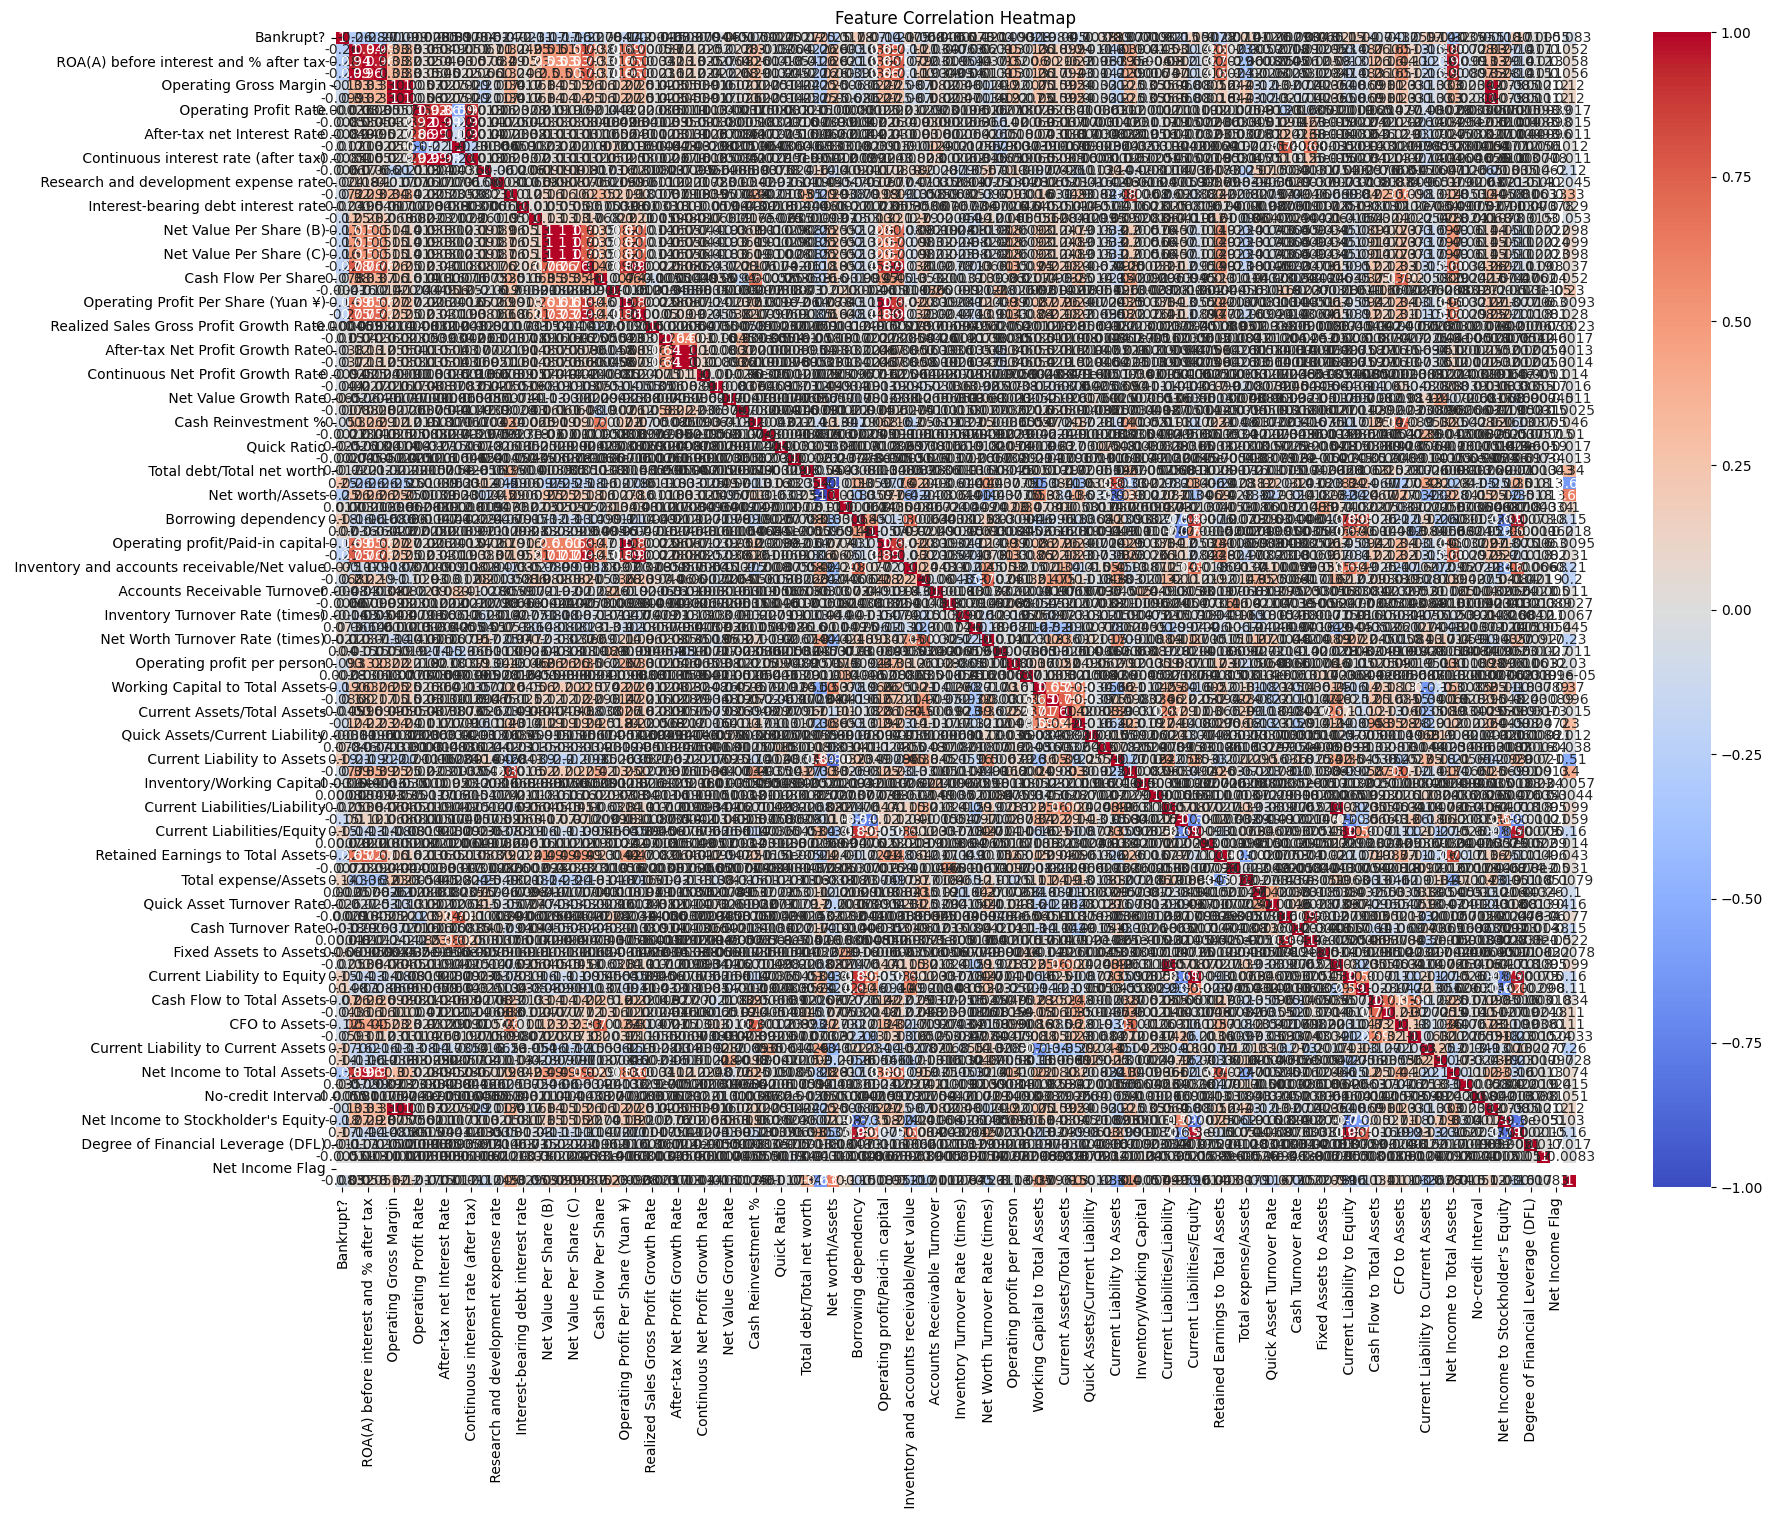

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
import pandas as pd


df_bankrupt_1 = df[df['Bankrupt?'] == 1]


df_bankrupt_0 = df[df['Bankrupt?'] == 0]

df_bankrupt_0_sampled = df_bankrupt_0.sample(n=280, random_state=42)

df_final = pd.concat([df_bankrupt_1, df_bankrupt_0_sampled], axis=0)

df_final = df_final.reset_index(drop=True)

columns_to_keep = [
    'Bankrupt?', ' Operating Expense Rate', ' Research and development expense rate',
    ' Interest-bearing debt interest rate', ' Total Asset Growth Rate', ' Quick Ratio',
    ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)',
    ' Fixed Assets Turnover Frequency', ' Allocation rate per person', ' Cash/Current Liability',
    ' Inventory/Current Liability', ' Long-term Liability to Current Assets',
    ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate', ' Cash Turnover Rate',
    ' Total assets to GNP price'
]

df_final = df_final[columns_to_keep]

print(df_final.head())
print(df_final.shape)



   Bankrupt?   Operating Expense Rate   Research and development expense rate  \
0          1             1.256969e-04                                     0.0   
1          1             2.897851e-04                                     0.0   
2          1             2.361297e-04                              25500000.0   
3          1             1.078888e-04                                     0.0   
4          1             7.890000e+09                                     0.0   

    Interest-bearing debt interest rate   Total Asset Growth Rate  \
0                              0.000725              4.980000e+09   
1                              0.000647              6.110000e+09   
2                              0.000790              7.280000e+09   
3                              0.000449              4.880000e+09   
4                              0.000686              5.510000e+09   

    Quick Ratio   Accounts Receivable Turnover   Average Collection Days  \
0      0.001208       

In [ ]:
df_final

Bankrupt?   Operating Expense Rate  \
0            1             1.256969e-04   
1            1             2.897851e-04   
2            1             2.361297e-04   
3            1             1.078888e-04   
4            1             7.890000e+09   
..         ...                      ...   
495          0             1.466271e-04   
496          0             1.714889e-04   
497          0             7.370000e+08   
498          0             3.170000e+09   
499          0             9.930000e+09   

      Research and development expense rate  \
0                              0.000000e+00   
1                              0.000000e+00   
2                              2.550000e+07   
3                              0.000000e+00   
4                              0.000000e+00   
..                                      ...   
495                            6.250000e+08   
496                            8.630000e+09   
497                            3.060000e+08   
498                            0.000000e+00   
499                            5.500000e+09   

      Interest-bearing debt interest rate   Total Asset Growth Rate  \
0                                0.000725              4.980000e+09   
1                                0.000647              6.110000e+09   
2                                0.000790              7.280000e+09   
3                                0.000449              4.880000e+09   
4                                0.000686              5.510000e+09   
..                                    ...                       ...   
495                              0.000000              5.950000e+09   
496                              0.000437              5.860000e+09   
497                              0.000641              9.280000e+09   
498                              0.000817              6.360000e+09   
499                              0.000338              7.850000e+09   

      Quick Ratio   Accounts Receivable Turnover   Average Collection Days  \
0        0.001208                       0.001814                  0.003487   
1        0.004039                       0.001286                  0.004917   
2        0.005348                       0.001495                  0.004227   
3        0.002896                       0.001966                  0.003215   
4        0.003727                       0.001449                  0.004367   
..            ...                            ...                       ...   
495      0.025337                       0.001286                  0.004914   
496      0.008134                       0.001392                  0.004543   
497      0.006667                       0.000986                  0.006418   
498      0.002177                       0.001083                  0.005832   
499      0.009355                       0.001179                  0.005367   

      Inventory Turnover Rate (times)   Fixed Assets Turnover Frequency  \
0                        1.820926e-04                      1.165007e-04   
1                        9.360000e+09                      7.190000e+08   
2                        6.500000e+07                      2.650000e+09   
3                        7.130000e+09                      9.150000e+09   
4                        1.633674e-04                      2.935211e-04   
..                                ...                               ...   
495                      2.852720e-04                      1.263351e-04   
496                      1.179876e-03                      3.290765e-04   
497                      1.960409e-04                      3.101641e-04   
498                      3.990000e+09                      2.072804e-04   
499                      9.100000e+09                      3.124336e-04   

      Allocation rate per person   Cash/Current Liability  \
0                       0.037135             1.473360e-04   
1                       0.012335             1.383910e-03   
2                       0.141016             5.34

In [ ]:
df_final.columns

Index(['Bankrupt?', ' Operating Expense Rate',
       ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Total Asset Growth Rate',
       ' Quick Ratio', ' Accounts Receivable Turnover',
       ' Average Collection Days', ' Inventory Turnover Rate (times)',
       ' Fixed Assets Turnover Frequency', ' Allocation rate per person',
       ' Cash/Current Liability', ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets',
       ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate',
       ' Cash Turnover Rate', ' Total assets to GNP price'],
      dtype='object')

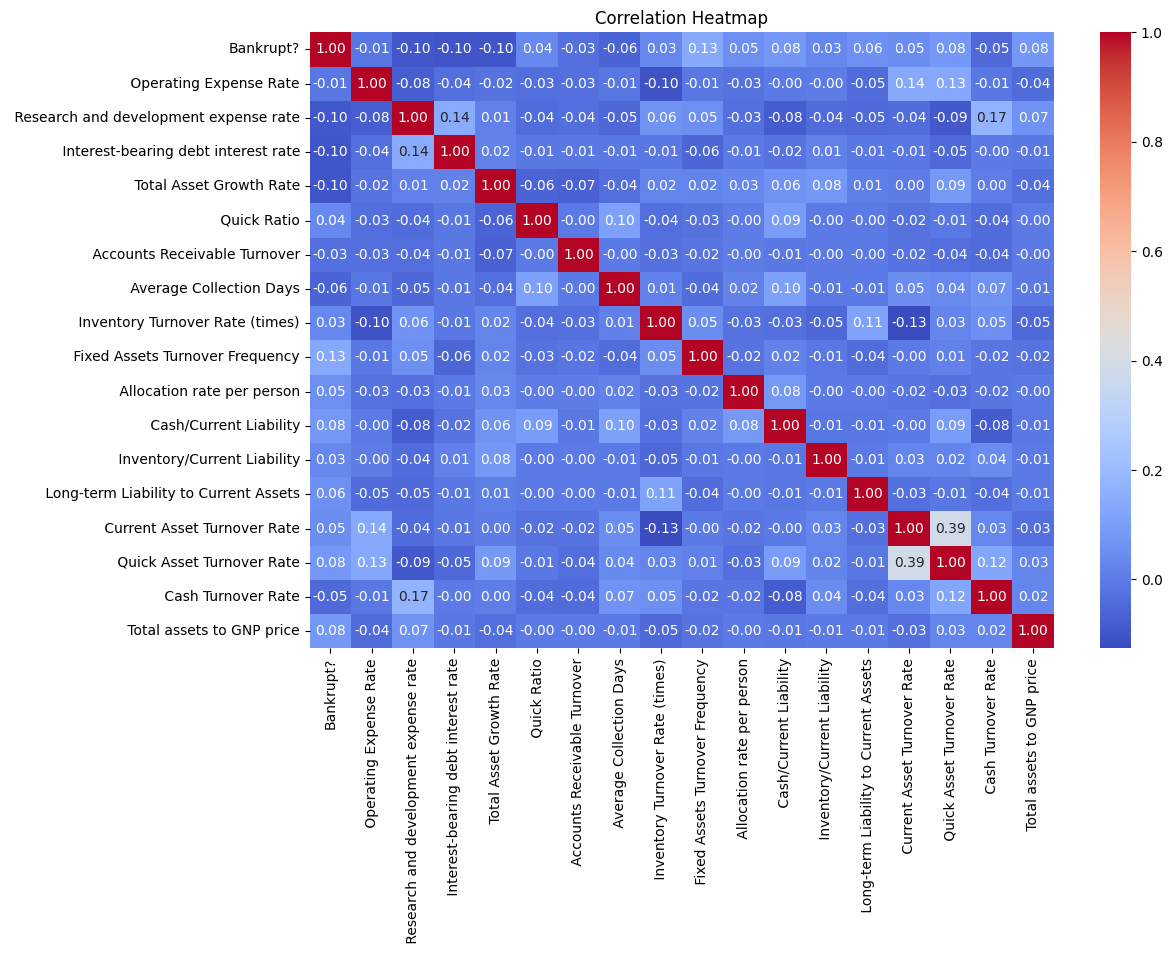

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df_final.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
sns.pairplot(df_final)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = df_final.drop('Bankrupt?', axis=1)
y = df_final['Bankrupt?']

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

most_important_feature = feature_importances.iloc[0]

print("Most Important Feature:", most_important_feature['Feature'])
print("Importance Score:", most_important_feature['Importance'])

plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for Determining Bankruptcy')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X = df_final.drop('Bankrupt?', axis=1)
y = df_final['Bankrupt?']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

importances = xgb.XGBRegressor().fit(X_train, y_train).feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
most_important_feature = feature_importances.iloc[0]['Feature']


model_all_features = xgb.XGBRegressor()
model_all_features.fit(X_train, y_train)
y_pred_all_features = model_all_features.predict(X_test)
mse_all_features = mean_squared_error(y_test, y_pred_all_features)


X_train_important = X_train[[most_important_feature]]
X_test_important = X_test[[most_important_feature]]
model_important_feature = xgb.XGBRegressor()
model_important_feature.fit(X_train_important, y_train)
y_pred_important_feature = model_important_feature.predict(X_test_important)
mse_important_feature = mean_squared_error(y_test, y_pred_important_feature)

print(f'Most Important Feature: {most_important_feature}')
print(f'MSE with All Features: {mse_all_features}')
print(f'MSE with Only Most Important Feature: {mse_important_feature}')


import matplotlib.pyplot as plt
import seaborn as sns


comparison_df = pd.DataFrame({
    'Model': ['All Features', 'Most Important Feature'],
    'MSE': [mse_all_features, mse_important_feature]
})


plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=comparison_df)
plt.title('Comparison of Model Performance')
plt.show()


In [ ]:
plt.figure(figsize=(14, 6))

plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_all_features, label='Predicted - All Features', color='blue')

plt.plot(y_pred_important_feature, label='Predicted - Most Important Feature', color='red')

plt.title('Comparison of Predicted vs Actual Values')
plt.xlabel('Samples')
plt.ylabel('Bankruptcy')
plt.legend()
plt.show()


In [ ]:
df_final.to_csv('filter_dataset.csv', index=False)

In [ ]:
from google.colab import files
files.download('filter_dataset.csv')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 10))
correlation_matrix = df_final.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
numerical_features = df_final.drop('Bankrupt?', axis=1).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Bankrupt?', y=feature, data=df_final)
    plt.title(f'Boxplot of {feature} by Bankruptcy Status')
    plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Total Asset Growth Rate', y=' Cash Turnover Rate', data=df_final)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Asset Growth Rate (Log Scale)')
plt.ylabel('Cash Turnover Rate (Log Scale)')
plt.title('Log-Scaled Scatter Plot of Total Asset Growth Rate vs Cash Turnover Rate')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    plt.hist(df_final[feature].replace(0, np.nan).dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(f'{feature} (Log Scale)')
    plt.ylabel('Frequency (Log Scale)')
    plt.title(f'Log-Scaled Histogram of {feature}')
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        plt.figure(figsize=(10, 6))
        feature_x = numerical_features[i]
        feature_y = numerical_features[j]

        df_filtered_nonzero = df_final.replace(0, np.nan).dropna(subset=[feature_x, feature_y])

        sns.scatterplot(
            x=df_filtered_nonzero[feature_x],
            y=df_filtered_nonzero[feature_y],
            size=df_filtered_nonzero[feature_x].abs(),
            sizes=(20, 200),
            alpha=0.5
        )
        plt.xscale('linear')
        plt.yscale('linear')
        plt.xlabel(f'{feature_x}')
        plt.ylabel(f'{feature_y}')
        plt.title(f'Size-Scaled Scatter Plot of {feature_x} vs {feature_y}')
        plt.legend(title=feature_x)
        plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_final, diag_kind='kde', plot_kws={'alpha':0.5})

plt.suptitle('Scatter Plot Matrix with Marginal Density Plots', y=1.02)
plt.show()